In [2]:
# K point convergence and parameters important for VASP bulk calculations 
from pyiron import Project, ase_to_pyiron
import matplotlib.pyplot as plt
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time

In [3]:
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/vasp/K_Convergence/static")

In [3]:
#k_spacings = np.arange(0, 3, 1)
#k_spacings
ex = len(range(900,1350,50))

In [4]:
#k_points = ['2_2_1','3_3_1','3_3_2','4_4_1','4_4_2','4_4_3','5_5_1','5_5_2','5_5_3','5_5_4','6_6_1', '6_6_2']
#for i in range(ex):
#    print(i)
#for i in k_spacings:
#    job = pr['Ecut_4_%s'%i]
#    job.transfer_from_remote()
#    job.compress() 

In [4]:
# Plot 
job_0 = pr["K_mesh_2_2_1"]   # (2x2x1)
job_1 = pr["K_mesh_3_3_1"]   # (3x3x1)
job_2 = pr["K_mesh_3_3_2"]   # (3x3x2)
job_3 = pr["K_mesh_4_4_1"]   # (4x4x1)
job_4 = pr["K_mesh_4_4_2"]   # (4x4x2)
#job_4_2 = pr["K_mesh_4x4x2_0"]   # (4x4x2)
job_5 = pr["K_mesh_4_4_3"]   # (4x4x3)
job_6 = pr["K_mesh_5_5_1"]   # (5x5x1)
job_7 = pr["K_mesh_5_5_2"]   # (5x5x2)
job_8 = pr["K_mesh_6_6_1"]   # (6x6x1)
job_9 = pr["K_mesh_6_6_2"]   # (6x6x2)
job_10 = pr["K_mesh_6_6_3"]   # (6x6x3)

2022-07-11 08:32:11,010 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-07-11 08:32:11,018 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-07-11 08:32:11,037 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

In [5]:
pot_0 = (job_0['output/generic/energy_pot'][-1])/132
pot_1 = (job_1['output/generic/energy_pot'][-1])/132
pot_2 = (job_2['output/generic/energy_pot'][-1])/132
pot_3 = (job_3['output/generic/energy_pot'][-1])/132
pot_4 = (job_4['output/generic/energy_pot'][-1])/132
#pot_4_2 = job_4['output/generic/energy_pot'][-1]
pot_5 = (job_5['output/generic/energy_pot'][-1])/132
pot_6 = (job_6['output/generic/energy_pot'][-1])/132
pot_7 = (job_7['output/generic/energy_pot'][-1])/132
pot_8 = (job_8['output/generic/energy_pot'][-1])/132
pot_9 = (job_9['output/generic/energy_pot'][-1])/132
pot_10 = (job_10['output/generic/energy_pot'][-1])/132

tot_energy_1 = [pot_0, pot_1, pot_3, pot_6, pot_8]   #XxYx1
tot_energy_2 = [pot_2, pot_4, pot_7, pot_9]          #XxYx2   
tot_energy_3 = [pot_5, pot_10]                       #XxYx3

In [6]:
total_energyy = [pot_0,pot_1,pot_2,pot_3,pot_4,pot_5,pot_6,pot_7,pot_8,pot_9,pot_10]

In [10]:
en_diff = []
for i in range(len(total_energyy)):
    en_diff.append(total_energyy[i]-total_energyy[len(total_energyy)-1])

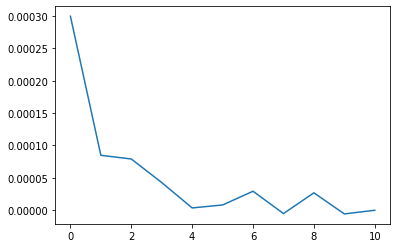

In [13]:
plt.plot(en_diff)

In [ ]:
k_density = 

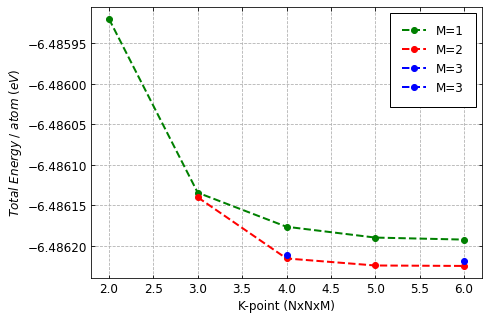

In [7]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([0,101])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(np.arange(2,7,1), tot_energy_1, label = 'M=1', marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
plt.plot(np.arange(3,7,1), tot_energy_2, label = 'M=2', marker='o', color='red', linewidth=2, linestyle='--')
plt.plot(np.arange(4,5,1), pot_5, label = 'M=3', marker='o', color='blue', linewidth=2, linestyle='--')
plt.plot(np.arange(6,7,1), pot_10, label = 'M=3', marker='o', color='blue', linewidth=2, linestyle='--')
#plt.axhline(y = min_ene, color ="red", linestyle ="-")
plt.grid(which='both')
plt.grid(True, linestyle='--')
#plt.title("K-space convergence plot")
plt.xlabel(r"K-point (NxNxM)", fontsize=12)
plt.ylabel("$Total$ $Energy$ $/$ $atom$ $(eV)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("kspace_new.png", bbox_inches='tight', dpi=600, transparent=False)

In [8]:
ecut_new = []
for i in range(len(tot_energy_2)):
    ecut_new.append(abs(tot_energy_2[i]-tot_energy_2[i-1]))
    #else:
    #    diff.append(abs(tot_energy_1[i]-tot_energy_1[i]))
ecut_new

[8.476113636390892e-05,
 7.551962121254974e-05,
 8.67772727275451e-06,
 5.637878786046713e-07]

In [7]:
b = job_1['output/generic/forces']
a = job_0['output/generic/forces']
c = job_3['output/generic/forces']
d = job_6['output/generic/forces']
e = job_8['output/generic/forces']
f = job_2['output/generic/forces']
g = job_4['output/generic/forces']
h = job_7['output/generic/forces']
j = job_9['output/generic/forces']
k = job_5['output/generic/forces']
l = job_10['output/generic/forces']
a_l = []
b_l = []
c_l = []
d_l = []
e_l = []
f_l = []
g_l = []
h_l = []
j_l = []
k_l = []
l_l = []
for i in range(0,132,1):
    a_l.append(np.sum(a[0][i][0])+np.sum(a[0][i][1])+np.sum(a[0][i][0])) 
    b_l.append(np.sum(b[0][i][0])+np.sum(b[0][i][1])+np.sum(b[0][i][0]))
    c_l.append(np.sum(c[0][i][0])+np.sum(c[0][i][1])+np.sum(c[0][i][0]))
    d_l.append(np.sum(d[0][i][0])+np.sum(d[0][i][1])+np.sum(d[0][i][0]))
    e_l.append(np.sum(e[0][i][0])+np.sum(e[0][i][1])+np.sum(e[0][i][0]))
    f_l.append(np.sum(f[0][i][0])+np.sum(f[0][i][1])+np.sum(f[0][i][0]))
    g_l.append(np.sum(g[0][i][0])+np.sum(g[0][i][1])+np.sum(g[0][i][0]))
    h_l.append(np.sum(h[0][i][0])+np.sum(h[0][i][1])+np.sum(h[0][i][0]))
    j_l.append(np.sum(j[0][i][0])+np.sum(j[0][i][1])+np.sum(j[0][i][0]))
    k_l.append(np.sum(k[0][i][0])+np.sum(k[0][i][1])+np.sum(k[0][i][0]))
    l_l.append(np.sum(l[0][i][0])+np.sum(l[0][i][1])+np.sum(l[0][i][0]))


2022-06-01 04:52:30,491 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:52:30,492 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:52:30,494 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

In [8]:
import math
li = [np.sum(a_l),np.sum(b_l),np.sum(c_l),np.sum(d_l),np.sum(e_l)]
li_1 = [np.sum(f_l),np.sum(g_l),np.sum(h_l),np.sum(j_l)]
li_2 = [np.sum(k_l),np.sum(l_l)]
rmse = []
rmse_1 = []
rmse_2 = []

for i in li:
    MSE = np.square(np.subtract(0,i)).mean()
    RMSE = math.sqrt(MSE)
    rmse.append(RMSE)
    #print(RMSE)
for i in li_1:
    MSE_1 = np.square(np.subtract(0,i)).mean()
    RMSE_1 = math.sqrt(MSE_1)
    rmse_1.append(RMSE_1)
for i in li_2:
    MSE_1 = np.square(np.subtract(0,i)).mean()
    RMSE_1 = math.sqrt(MSE_1)
    rmse_2.append(RMSE_1)

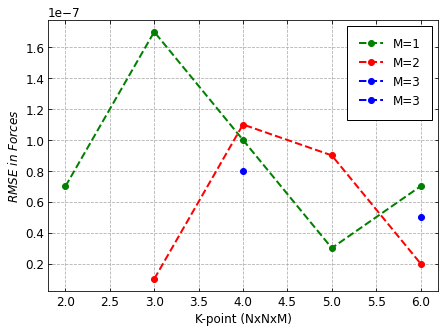

In [9]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([0,101])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(np.arange(2,7,1), rmse, label = 'M=1', marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
plt.plot(np.arange(3,7,1), rmse_1, label = 'M=2', marker='o', color='red', linewidth=2, linestyle='--')
plt.plot(np.arange(4,5,1), rmse_2[0], label = 'M=3', marker='o', color='blue', linewidth=2, linestyle='--')
plt.plot(np.arange(6,7,1), rmse_2[1], label = 'M=3', marker='o', color='blue', linewidth=2, linestyle='--')
plt.grid(which='both')
plt.grid(True, linestyle='--')
#plt.title("K-space convergence plot")
plt.xlabel(r"K-point (NxNxM)", fontsize=12)
plt.ylabel("$RMSE$ $in$ $Forces$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("RMSE_forces_kpoints.png", bbox_inches='tight', dpi=600, transparent=False)

In [10]:
from ase.io import read, write
from ase import Atoms
import ase

bulk_struct = Atoms(read(filename='443K_nasicon_random_min.cif',format='cif'))

In [11]:
# Ploting change in energy per atom 
energy = [pot_0, pot_1, pot_2, pot_3, pot_4, pot_5, pot_6, pot_7, pot_8, pot_9, pot_10]
atoms = 132
eng_atoms = []
for i in energy:
    eng_atoms.append(i/atoms)

In [13]:
pot_1 = job_1['output/generic/energy_pot'][-1]
pot_1_a = job_1['output/generic/forces'][-1]
pot_2 = job_2['output/generic/energy_pot'][-1]
pot_2_a = job_2['output/generic/forces'][-1]
pot_3 = job_3['output/generic/energy_pot'][-1]
pot_3_a = job_3['output/generic/forces'][-1]
pot_4 = job_4['output/generic/energy_pot'][-1]
pot_4_a = job_4['output/generic/forces'][-1]
pot_5 = job_5['output/generic/energy_pot'][-1]
pot_5_a = job_5['output/generic/forces'][-1]
pot_6 = job_6['output/generic/energy_pot'][-1]
pot_6_a = job_6['output/generic/forces'][-1]
pot_7 = job_7['output/generic/energy_pot'][-1] 
pot_7_a = job_7['output/generic/forces'][-1]
pot_8 = job_8['output/generic/energy_pot'][-1]
pot_8_a = job_8['output/generic/forces'][-1]
#pot_9 = job_8['output/generic/energy_pot'][-1]
#pot_9_a = job_8['output/generic/forces'][-1]
#pot_10 = job_9['output/generic/energy_pot'][-1]
#pot_10_a = job_9['output/generic/forces'][-1]
#pot_11 = job_10['output/generic/energy_pot'][-1]
#pot_11_a = job_10['output/generic/forces'][-1]

tot_energy = [pot_1, pot_2, pot_3, pot_4, pot_5, pot_6, pot_7, pot_8]
forces = [pot_1_a, pot_2_a, pot_3_a, pot_4_a, pot_5_a, pot_6_a, pot_7_a, pot_8_a] 

2022-06-01 04:53:45,461 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:53:45,463 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:53:45,465 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

In [14]:
min_ene = np.min(tot_energy)
min_ene

-856.18159213

In [15]:
rel_energy = []
for i in tot_energy:
    rel_energy.append(i-min_ene)

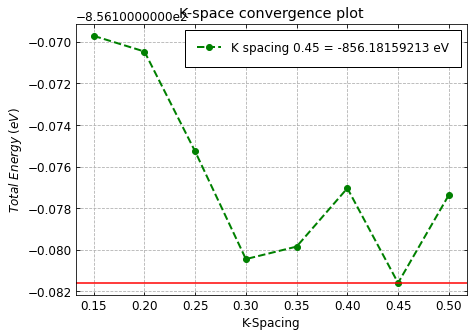

In [16]:
x = np.arange(0.15, 0.55, 0.050)
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([0,101])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(x, tot_energy, label = "K spacing {} = {} eV".format(np.round(x[tot_energy.index(np.min(tot_energy))],2), np.min(tot_energy)), marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
plt.axhline(y = min_ene, color ="red", linestyle ="-")
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("K-space convergence plot")
plt.xlabel(r"K-Spacing", fontsize=12)
plt.ylabel("$Total$ $Energy$ $(eV)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("kspace_1.png", bbox_inches='tight', dpi=600, transparent=False)

In [17]:
job = pr["Ecut_1"]

2022-06-01 04:54:02,839 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:54:02,845 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-06-01 04:54:02,859 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

In [18]:
job['output/generic/forces']

2022-06-01 04:54:08,291 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').


array([[[-0.46875752,  0.53097372, -0.88154407],
        [-0.74223286, -1.15218949, -1.89276319],
        [ 2.1937414 , -0.81691043,  0.402441  ],
        [-1.67048438,  0.94549061,  0.47789752],
        [-1.55946607, -1.26466949, -0.18236444],
        [ 0.02013762,  0.71014769, -1.08858273],
        [ 0.15720955, -2.26408814,  1.66092083],
        [-3.44665538, -2.1837541 ,  0.41583237],
        [ 1.09667146,  0.41593929,  1.01533146],
        [ 1.70485808, -0.26515151, -0.41110063],
        [ 1.33413335, -1.59102081, -0.66339835],
        [-1.1661919 ,  2.25872399, -0.29445617],
        [-1.79476787, -1.18860188, -0.42993851],
        [ 0.38671017, -0.10223622, -0.43970323],
        [ 0.56414547,  0.14086305,  0.5862532 ],
        [ 1.07374406, -1.85805051,  0.30563296],
        [-0.36411321,  0.90460132,  0.7216477 ],
        [-1.11861284,  0.18258344,  1.13467395],
        [-0.43277017,  0.03438845,  0.37539959],
        [-0.22533267,  1.87303875, -0.00604981],
        [-0.51104339

In [7]:
# Ecut plot 
ecut = []
for i in range(len(range(900,1000,50))):
    job = pr["Ecut_%s"%i]
    ecut.append(job['output/generic/energy_pot'][-1])

OSError: Unable to open file (file signature not found)

In [21]:
ecut_2 = []
for i in range(ex):
#for i in range(400, 720, 20):
    #print("ECut_2_%s"%i)
    job_new = pr["ECut_%s"%i]
    ecut_2.append(job_new['output/generic/energy_pot'][-1])

ValueError: Unknown item: ECut_0

In [23]:
ecut

[-869.57408921,
 -860.17815869,
 -857.64343605,
 -856.46800674,
 -856.12335786,
 -856.18929489,
 -856.3860399,
 -856.56338047,
 -856.70030565,
 -856.76009134,
 -856.79924531,
 -856.80694165]

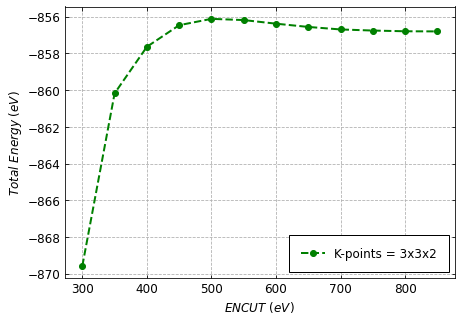

In [28]:
x_1 = np.arange(300,900,50)
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([400,540])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(x_1, ecut, label = "K-points = 3x3x2", marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
#plt.plot(x_1, ecut_2, label = "K-spacing (1x1x1)= 0.55", marker='o', color='red', linewidth=2, linestyle='--') #fillstyle='none'
#plt.axvline(x = 500, color ="grey", linestyle =":")
#plt.axvline(x = 480, color ="grey", linestyle =":")
#plt.axvline(x = 520, color ="grey", linestyle =":")
#plt.axvline(x = 540, color ="grey", linestyle =":")
#plt.axvspan(480, 540, color='yellow', alpha=0.5)
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("")
plt.xlabel("$ENCUT$ $(eV)$", fontsize=12)
plt.ylabel("$Total$ $Energy$ $(eV)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("energy_cut_2.png", bbox_inches='tight', dpi=600, transparent=False)

In [18]:
#for i in range(480, 560, 20):
#    job = pr["static_SCAN_%s_05"%i]
#    job.transfer_from_remote()
#    job.compress() 

/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 21/21 [00:04<00:00,  4.59it/s]
--- Logging error ---
Traceback (most recent call last):
  File "/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
RuntimeError: reentrant call inside <_io.BufferedWriter name='/nfshome/deshmukh/vaibhav/project/va

In [19]:
scan = []
rscan = []
r2scan = []
pbe = []
for i in range(480, 560, 20):
    job = pr["static_SCAN_%s_05"%i]
    job_1 = pr["static_RSCAN_%s_05"%i]
    job_2 = pr["static_R2SCAN_%s_05"%i]
    job_3 = pr["ECut_%s"%i]
    scan.append(job['output/generic/energy_pot'][-1])
    rscan.append(job_1['output/generic/energy_pot'][-1])
    r2scan.append(job_2['output/generic/energy_pot'][-1])
    pbe.append(job_3['output/generic/energy_pot'][-1])

2022-04-24 12:01:38,932 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-04-24 12:01:38,938 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-04-24 12:01:38,952 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

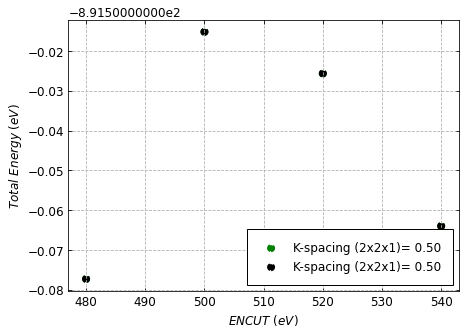

In [33]:
x_2 = np.arange(480,560,20)
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([400,540])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.scatter(x_2, pbe, label = "K-spacing (2x2x1)= 0.50", marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
#plt.plot(x_2, scan, label = "K-spacing (2x2x1)= 0.50", marker='o', color='red', linewidth=2, linestyle='--') #fillstyle='none'
plt.scatter(x_2, rscan, label = "K-spacing (2x2x1)= 0.50", marker='o', color='black', linewidth=2, linestyle='--') #fillstyle='none'
#plt.scatter(x_2, r2scan, label = "K-spacing (2x2x1)= 0.50", marker='o', color='blue', linewidth=2, linestyle='--') #fillstyle='none'
#plt.plot(x_1, ecut_2, label = "K-spacing (1x1x1)= 0.55", marker='o', color='red', linewidth=2, linestyle='--') #fillstyle='none'
#plt.axvline(x = 500, color ="grey", linestyle =":")
#plt.axvline(x = 480, color ="grey", linestyle =":")
#plt.axvline(x = 520, color ="grey", linestyle =":")
#plt.axvspan(480, 520, color='yellow', alpha=0.5)
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("")
plt.xlabel("$ENCUT$ $(eV)$", fontsize=12)
plt.ylabel("$Total$ $Energy$ $(eV)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("energy_cut_1.png", bbox_inches='tight', dpi=600, transparent=False)

In [25]:
rscan

[-891.57728312, -891.51519771, -891.52566154, -891.56399116]

In [26]:
r2scan

[-891.57728312, -891.51519771, -891.52566154, -891.56399116]

In [27]:
pbe

[-891.57728363, -891.51519717, -891.52566132, -891.56399215]

In [28]:
scan

[-1455.22826534, -1455.14157429, -1455.13888255, -1455.17197343]

In [35]:
time_sec = [14636.255,6529.895,4625.544,4635.723,4255.356,4248.906,4318.138,4318.138]
x_n = np.arange(0.15, 0.55, 0.050)

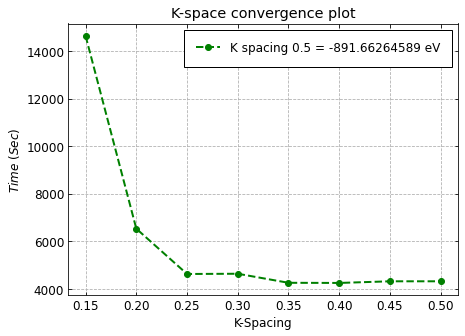

In [39]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 12})
#plt.xlim([0,101])
#plt.ylim([-0.5,14])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(x_n, time_sec, label = "K spacing {} = {} eV".format(np.round(x[tot_energy.index(np.min(tot_energy))],2), np.min(tot_energy)), marker='o', color='green', linewidth=2, linestyle='--') #fillstyle='none'
#plt.axhline(y = min_ene, color ="red", linestyle ="-")
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("K-space convergence plot")
plt.xlabel(r"K-Spacing", fontsize=12)
plt.ylabel("$Time$ $(Sec)$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")
plt.savefig("time_kspace_1.png", bbox_inches='tight', dpi=600, transparent=False)